In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

# Mathematical Concepts: Labs
## Author Solutions

### 1. Visualizing Complex Numbers
We're going to visualize a complex number on the (x, y) plane using its magnitude and argument. To get the rectangular coordinates, we'll be using a helper function. Note that using the Pythagorean theorem we can derive:
$$
x = r\cos(\theta) \\
y = r\sin(\theta)
$$

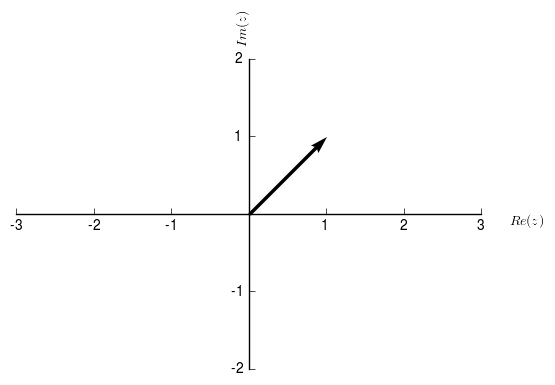

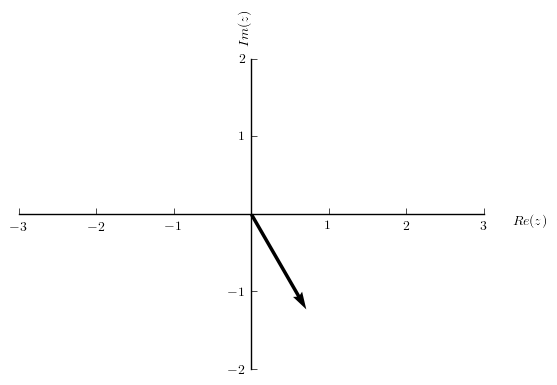

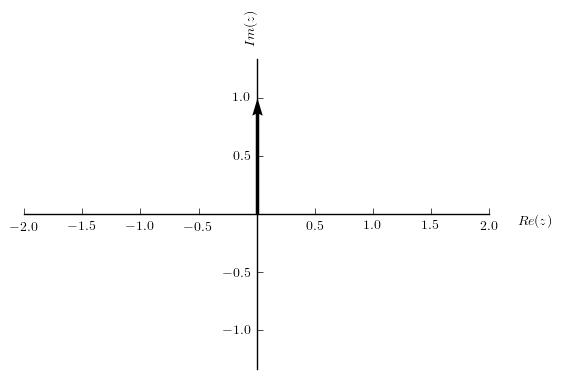

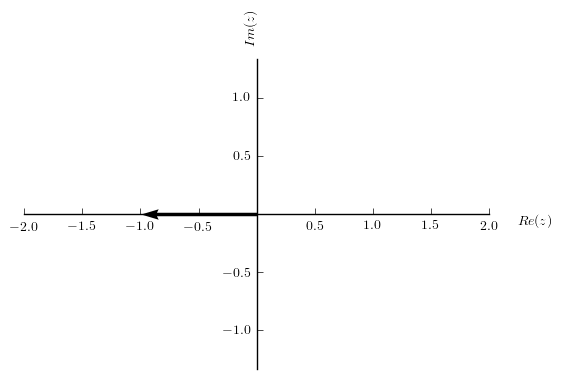

In [2]:
def get_rect_coords(r, theta):
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return (x, y)

def plot_complex_number(x, y):
    fig = plt.figure()
    plt.axis("equal")
    plt.rcParams["text.usetex"] = True
    ax = fig.add_subplot(111)
    
    # Calculate axis limits
    lim = max(2 * abs(x), 2 * abs(y))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.quiver(0, 0, x, y, units = "xy", scale = 1)
    
    format_all_axes(ax)
    
    plt.show()
    
def format_all_axes(ax):
    # Format the axes so that they appear at the center of the plot
    ax.spines["left"].set_position("center")
    ax.spines["bottom"].set_position("center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")
    
    #Remove (0, 0) from the axes since they overlap badly
    ax.set_xticks(ax.get_xticks()[np.where(ax.get_xticks() != 0)])    
    ax.set_yticks(ax.get_yticks()[np.where(ax.get_yticks() != 0)])
    
    ax.set_xlabel(r"$Re(z)$")
    ax.set_ylabel(r"$Im(z)$")
    ax.xaxis.set_label_coords(1.1, 0.5) 
    ax.yaxis.set_label_coords(0.5, 1.1) 

def visualize_complex_number(r, theta):
    (x, y) = get_rect_coords(r, theta)
    plot_complex_number(x, y)

visualize_complex_number(math.sqrt(2), math.pi / 4)
visualize_complex_number(math.sqrt(2), -math.pi / 3)
visualize_complex_number(1, math.pi / 2)
visualize_complex_number(1, math.pi)

### 2. Polar Coordinates
In this lab we'll be plotting a few functions in polar coordinates to get a feel of what they look like and why they are useful. 

If we ever need a coordinate system different than the Cartesian one, it is only because it's easier for a certain type of problems. Some problems which are much easier in polar coordinates (and harder or even impossible in Cartesian coordinates) are problems which have some sort of central symmetry.

We'll be plotting these functions:
$$
r = \sin(\theta) \\
r = 1 +\sin(\theta) \\
r = \theta^2
$$

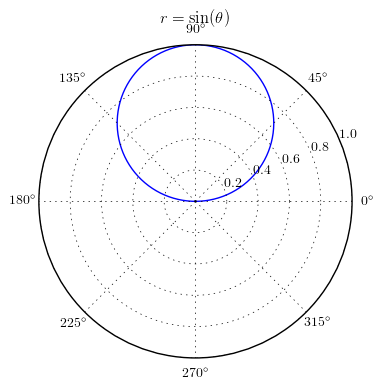

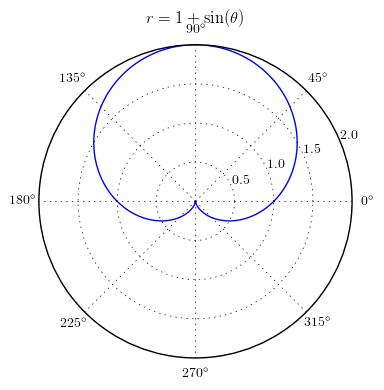

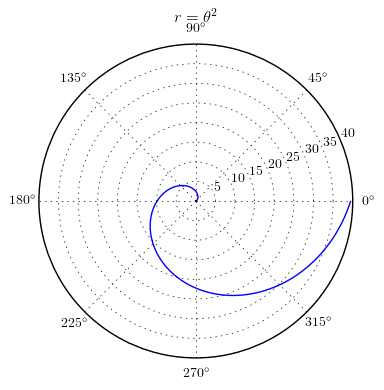

In [3]:
plt.rcParams["text.usetex"] = True
theta = np.arange(0, 2 * math.pi, 0.01)
def f1():
    r = np.sin(theta)
    return (r, theta)
def f2():
    r = 1 + np.sin(theta)
    return (r, theta)
def f3():
    r = theta ** 2
    return (r, theta)

def plot_polar(r, theta, title):
    ax = plt.subplot(111, projection = "polar")
    ax.set_title(title)
    ax.plot(theta, r)
    plt.tight_layout()
    plt.show()
    
r, theta = f1()
plot_polar(r, theta, r"$r = \sin(\theta)$")
r, theta = f2()
plot_polar(r, theta, r"$r = 1 + \sin(\theta)$")
r, theta = f3()
plot_polar(r, theta, r"$r = \theta^2$")

### 3. Matrix Operations
We're going to implement the basic matrix operations:
* Addition
* Multiplication by a scalar
* Matrix multiplication
    * Vector dot product (this is a special case of matrix multiplication so we're going to use that)
    
Matrices are given as Python 2D lists.

In this case, we'll be writing all operations manually but there are also ways to do these using libraries (such as `numpy.matrix` or `numpy.linalg`).

In [4]:
def add_matrices(m1, m2):
    if len(m1) != len(m2) or len(m1[0]) != len(m2[0]):
        raise ValueError("The dimensions are not the same.")
    rows, cols = len(m1), len(m1[0])
    result = np.zeros((rows, cols))
    for row in range(rows):
        for col in range(cols):
            result[row][col] = m1[row][col] + m2[row][col]
    return result
    
def scale_matrix(matrix, factor):
    rows, cols = len(matrix), len(matrix[0])
    result = np.zeros((rows, cols))
    for row in range(rows):
        for col in range(cols):
            result[row][col] = factor * matrix[row][col]
    return result

def multiply_matrices(m1, m2):
    m1_rows, m1_cols, m2_rows, m2_cols = len(m1), len(m1[0]), len(m2), len(m2[0])
    if m1_cols != m2_rows:
        raise ValueError("The dimensions of the matrices are incompatible.")
    result = np.zeros((m1_rows, m2_cols))
    
    for row in range(len(result)):
        for col in range(len(result[0])):
            for p in range(m1_cols):
                result[row][col] += m1[row][p] * m2[p][col]
    return result
    
def dot_product(v1, v2):
    if len(v1) != len(v2):
        raise ValueError("The vectors must have the same number of elements.")
    result = 0
    for p in range(len(v1)):
        result += v1[p] * v2[p]
    return result
    
print(add_matrices([[2, 3, 7], [8, 9, 1]], [[1, -3, 0], [2, -4, 1]]))
print(scale_matrix([[2, 3, 7], [8, 9, 1]], 2))
print(multiply_matrices([[2, 3, 7], [8, 9, 1]], [[1, 2, 0, 1], [-3, -4, 1, 3], [2, 0, 1, 1]]))
print(dot_product([1, 2, 0, 1], [-3, -4, 1, 3]))

print("Checking that matrix multiplication is not commutative:")
a = [[1, 0, -2], [0, 3, -1]]
b = [[0, 3], [-2, -1], [0, 4]]
print(multiply_matrices(a, b))
print(multiply_matrices(b, a))

[[  3.   0.   7.]
 [ 10.   5.   2.]]
[[  4.   6.  14.]
 [ 16.  18.   2.]]
[[  7.  -8.  10.  18.]
 [-17. -20.  10.  36.]]
-8
Checking that matrix multiplication is not commutative:
[[ 0. -5.]
 [-6. -7.]]
[[  0.   9.  -3.]
 [ -2.  -3.   5.]
 [  0.  12.  -4.]]


### 4. Solving a Linear System of Equations
In this lab, we're going to solve a linear system of equations given the system's matrix and vector of free terms: $A$ and $b$ in the matrix equation $Ax = b$. To make things simpler, we're going to use a library (`numpy.linalg`).

In [5]:
def solve_linear_system(A, b):
    return np.linalg.solve(A, b)

print(solve_linear_system([[1, 2, 5], [1, -1, 2], [3, -6, -1]], [-9, 3, 25]))

[ 2. -3. -1.]


### 5. Finding the Inverse of a Matrix
We're going to find the inverse of a matrix, once again using `numpy.linalg`. 

The inverse of a matrix, $A^-1$ is a matrix which satisfies $AA^-1=\mathbb{E}$.

In [6]:
def get_inverse(a):
    return np.linalg.inv(a)

print(get_inverse([[3, 0, 2], [2, 0, -2], [0, 1, 1]]))
# print(get_inverse([[0, 2, 2], [0, 4, 4], [3, 2, 1]])) # The first and second row are linearly dependent, the inverse does not exist

[[ 0.2  0.2  0. ]
 [-0.2  0.3  1. ]
 [ 0.2 -0.3 -0. ]]


### 6. Graphing Functions
We're going to graph some functions in order to:
1. See what their plots look like
2. Get a better grasp of `matplotlib`.

In this case, we're going to graph the following functions:
$$
y = 2x + 3 \\
y = x^2 - 2x + 5 \\
y = 2\sin(0.5x + 0.2) \\
y = 2e^{3x} \\
y = \frac{\sin(x)}{x}
$$

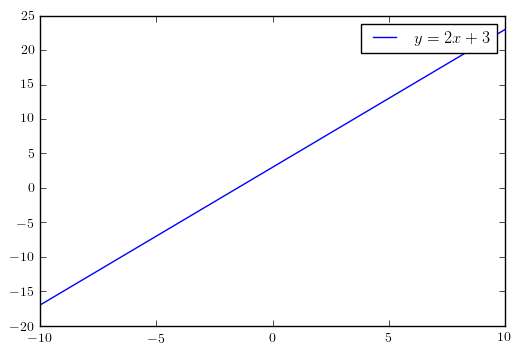

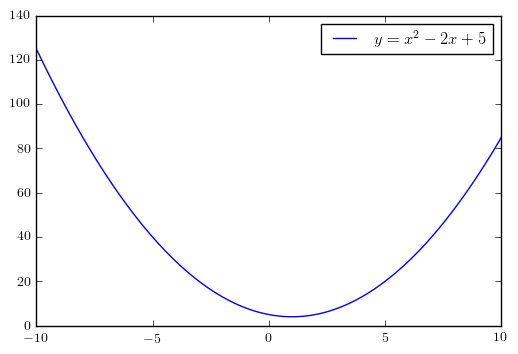

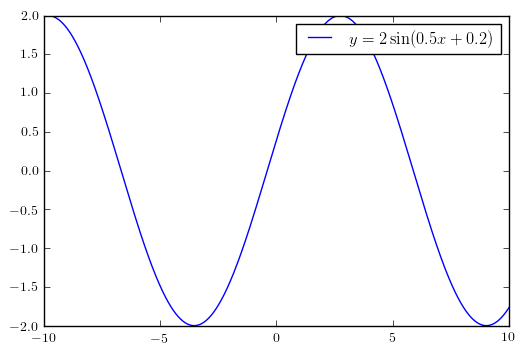

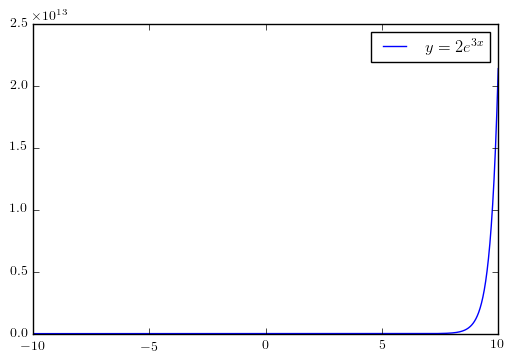

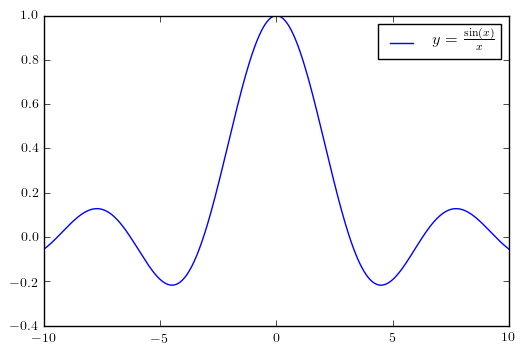

In [7]:
plt.rcParams["text.usetex"] = True
def plot_function(f, min_x, max_x, label, num_points = 1000):
    x = np.linspace(min_x, max_x, num_points)
    y = f(x)
    plt.figure()
    plt.plot(x, y, label = label)
    plt.legend()
    plt.show()
    
plot_function(lambda x: 2 * x + 3, -10, 10, r"$y = 2x + 3$")
plot_function(lambda x: x ** 2 - 2 * x + 5, -10, 10, r"$y = x^2 - 2x + 5$")
plot_function(lambda x: 2 * np.sin(0.5 * x + 0.2), -10, 10, r"$y = 2\sin(0.5x + 0.2)$")
plot_function(lambda x: 2 * np.exp(3 * x), -10, 10, r"$y = 2e^{3x}$")
plot_function(lambda x: np.sin(x) / x, -10, 10, r"$y = \frac{\sin(x)}{x}$")

### 7. Calculating Derivatives
We're going to calculate derivatives numerically. We can either do that "by hand" (using the definition of a derivative and substituting finite differences) or using libraries. We'll prefer the second approach for simplicity.

Since we're using a numerical method, the function `differentiate` is going to take a list of $x$'s and it will return the numeric approximation of the derivative of that list.

We're going to check this using $y = \sin(x)$. The derivative is $y' = \cos(x)$. We're going to plot the calculated derivative and the real function to see if they're close enough.

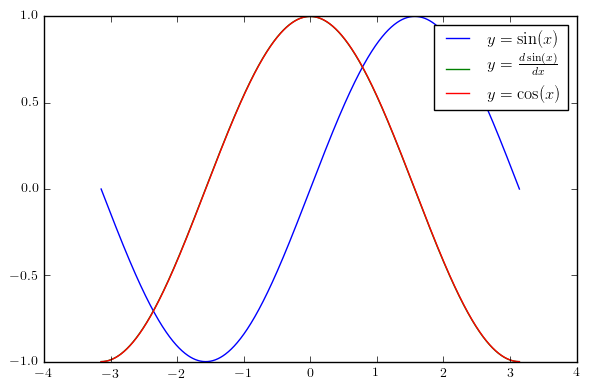

In [8]:
def differentiate(f):
    x, y = f[0], f[1]
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)  
    # Fix the endpoint (since np.diff returns an array with one less element)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dy

x = np.linspace(-math.pi, math.pi, 1000) # Change to 20 or 50 to see a little difference between the plots
y = np.sin(x)
f = [x, y]
y_prime = differentiate(f)

plt.rcParams["text.usetex"] = True
plt.plot(x, y, label = r"$y = \sin(x)$")
plt.plot(x, y_prime, label = r"$y = \frac{d\sin(x)}{dx}$")
plt.plot(x, np.cos(x), label = r"$y = \cos(x)$")
plt.legend()
plt.tight_layout()
plt.show()

### 8. Calculating Integrals
We can calculate definite integrals in a similar way. We can once again use the definition of an integral to form the so-called "trapezoidal rule". But we'll leave this to `numpy` to figure it out. We'll just pass a list of $x$'s and $y$'s.

After that, we're going to use our function to calculate the integrals:
$$
\int_0^\pi \sin(x)dx \\
\int_{-\pi}^\pi \sin(x)dx \\
\int_0^\pi e^{\sin(x)}dx \\
\int_0^\pi \sin^3(x)cos^2(x)dx
$$

Note that the function inside the library accepts the parameters in reverse order.

In [9]:
def integrate(f):
    return round(np.trapz(f[1], f[0]), 4)

x = np.linspace(0, math.pi, 1000)
y = np.sin(x)
print(integrate([x, y]))

x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)
print(integrate([x, y]))

x = np.linspace(0, math.pi, 1000)
y = np.exp(np.sin(x))
print(integrate([x, y]))

x = np.linspace(0, math.pi, 1000)
y = np.sin(x) ** 3 * np.cos(x) ** 2
print(integrate([x, y]))

2.0
0.0
6.2088
0.2667


### 9. Gradient Descent
Gradient descent is a simple method for finding local extrema of a function. It uses the derivative to find where it equals zero. We're going to implement a simple version of that.

We can extend this code easily. For example, we may want to check whether the extremum is minimum or maximum (in the example we know it's a minimum from other sources). To do that, we can check the second derivative.

In [10]:
x_old = 0 # abs(x_new - x_old) > precision
x_new = 6
step_size = 0.01 # step size
precision = 0.00001

def df(x):
    # f'(x^4 - 3x^3 + 2) = 4x^3 - 9x^2
    y = 4 * x**3 - 9 * x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += - step_size * df(x_old)

print("The local minimum occurs at " + str(round(x_new, 4)))


The local minimum occurs at 2.25
